# Runtime preparation

In [ ]:
import os

In [ ]:
running_in_colab = 'google.colab' in str(get_ipython())
homedir = ""
if running_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    homedir = "/content/drive/MyDrive"
else:
    homedir = os.getenv('HOME')


In [ ]:
if running_in_colab:
    from google.colab import data_table
    data_table.enable_dataframe_formatter()

# Loading BLEU data into data frame categorized by quarter

In [ ]:
base_path = homedir+'/mtd_data/'
bleu_scores_file = base_path+'bleu.csv'

import pandas as pd
metrics = pd.read_csv(
    bleu_scores_file,
    parse_dates=['date'],
    infer_datetime_format=True,
)
metrics = metrics.set_index('date').to_period('Q')

In [ ]:
metrics

,name,score,signature,verbose_score,nrefs,case,eff,tok,smooth,version,source_langid,target_langid,test_set,engine,domain
date,,,,,,,,,,,,,,,
2023Q2,BLEU,40.87,nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|v...,70.2/47.6/35.1/26.6 (BP = 0.972 ratio = 0.973 ...,1,mixed,no,13a,exp,2.3.1,en,de,wmt20,deepl,NaN
2023Q2,BLEU,43.18,nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|v...,71.9/49.8/37.2/28.5 (BP = 0.978 ratio = 0.979 ...,1,mixed,no,13a,exp,2.3.1,en,de,wmt20,microsoft,NaN
2023Q2,BLEU,34.63,nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|v...,63.0/40.3/28.2/20.1 (BP = 1.000 ratio = 1.022 ...,1,mixed,no,13a,exp,2.3.1,en,it,wmt09,deepl,NaN
2023Q2,BLEU,33.79,nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|v...,62.4/39.5/27.3/19.4 (BP = 1.000 ratio = 1.018 ...,1,mixed,no,13a,exp,2.3.1,en,it,wmt09,microsoft,NaN


# Drawing a chart

In [ ]:
chart = metrics[['source_langid','target_langid','test_set','engine','score']]
chart = chart.set_index(['source_langid','target_langid','test_set','engine'])
chart = chart.sort_values(['source_langid','target_langid','test_set','score'],ascending=[True,True,True,False])


In [ ]:
chart

score
source_langid target_langid test_set engine          
en            de            wmt20    microsoft  43.18
                                     deepl      40.87
              it            wmt09    deepl      34.63
                                     microsoft  33.79

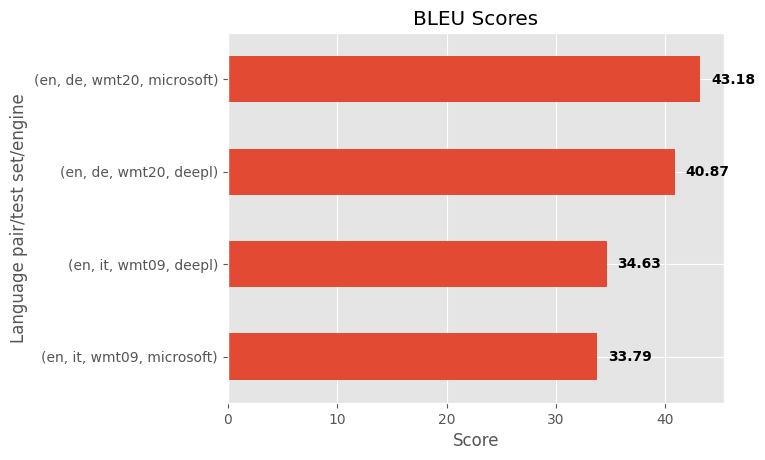

In [ ]:
#@title
import matplotlib.pyplot as plt

plt.close("all")
plt.style.use('ggplot')
ax = chart.plot.barh(legend=None)
plt.title('BLEU Scores')
plt.ylabel('Language pair/test set/engine')
plt.xlabel('Score')
ax.invert_yaxis()
# ax.bar_label() only available with matplotlib >= 3.4.0
# Using some code instead; drawback: labels can overlap right border of chart
for i, v in enumerate(chart['score']):
    ax.text(v + 1, i, str(v), va='center', fontweight='bold')
#ax.set_xlim(right=30) 
plt.show()
